In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.5)
%matplotlib inline

# 한글 사용 준비
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 국내인

In [2]:
re_data = pd.read_csv('data/shinhan_card/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt', delimiter='\t', parse_dates=['STD_DD'])

In [3]:
re_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,110,517,10,F,25,11,595
1,2019-02-01,110,517,10,F,50,5,243
2,2019-02-01,110,517,10,F,55,5,27
3,2019-02-01,110,517,10,M,20,11,243
4,2019-02-01,110,517,10,M,25,11,433


In [4]:
re_data.tail()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
2537748,2020-05-31,350,720,81,M,45,19,127
2537749,2020-05-31,350,720,81,M,50,33,211
2537750,2020-05-31,350,720,81,M,55,9,61
2537751,2020-05-31,350,720,81,M,60,19,194
2537752,2020-05-31,350,720,81,M,65,5,29


In [5]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   STD_DD      datetime64[ns]
 1   GU_CD       int64         
 2   DONG_CD     int64         
 3   MCT_CAT_CD  int64         
 4   SEX_CD      object        
 5   AGE_CD      int64         
 6   USE_CNT     int64         
 7   USE_AMT     int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 154.9+ MB


In [6]:
re_data.shape

(2537753, 8)

In [7]:
re_data.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
SEX_CD        0
AGE_CD        0
USE_CNT       0
USE_AMT       0
dtype: int64

In [8]:
re_data.GU_CD.value_counts()

350    761412
260    746820
140    667106
110    362415
Name: GU_CD, dtype: int64

In [9]:
re_data.DONG_CD.value_counts()

670    144986
640    127335
550    108809
680    105980
540    103374
570     97804
595     94899
580     94525
520     91711
590     89509
625     81089
630     80088
560     69696
665     62836
565     60065
650     57814
695     53205
575     49697
600     48723
605     48695
545     44764
615     43799
690     43572
651     41552
619     39166
621     38954
611     38483
624     37937
510     36796
635     36593
602     35544
561     33169
700     32201
610     32091
620     30731
652     30579
720     29328
710     29018
517     28247
530     27521
645     26585
612     24990
662     24352
661     23441
601     21333
585     19767
660     16400
Name: DONG_CD, dtype: int64

In [10]:
re_data.MCT_CAT_CD.value_counts()

40    326560
80    326471
81    291322
70    280001
71    211651
21    158288
33    143343
50    122479
62    111545
22     99595
42     94797
92     70101
20     67506
10     58095
44     50400
52     29515
35     26769
34     24659
32     16120
43     13810
60      6666
30      6102
31      1958
Name: MCT_CAT_CD, dtype: int64

In [11]:
re_data.SEX_CD.value_counts()

M    1295256
F    1242497
Name: SEX_CD, dtype: int64

In [12]:
re_data.AGE_CD.value_counts()

45    287695
50    280996
40    269982
25    264405
35    263903
30    256633
55    252090
65    221656
60    220820
20    219573
Name: AGE_CD, dtype: int64

In [13]:
re_data['year'] = re_data['STD_DD'].dt.year
re_data['month'] = re_data['STD_DD'].dt.month
re_data['day'] = re_data['STD_DD'].dt.day
re_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day
0,2019-02-01,110,517,10,F,25,11,595,2019,2,1
1,2019-02-01,110,517,10,F,50,5,243,2019,2,1
2,2019-02-01,110,517,10,F,55,5,27,2019,2,1
3,2019-02-01,110,517,10,M,20,11,243,2019,2,1
4,2019-02-01,110,517,10,M,25,11,433,2019,2,1


In [14]:
def concatenate_year_month(STD_DD):
    return '{0}-{1}'.format(STD_DD.year, STD_DD.month)

re_data['year_month'] = re_data['STD_DD'].apply(concatenate_year_month)

In [15]:
def concatenate_month_day(STD_DD):
    return '{0}-{1}'.format(STD_DD.month, STD_DD.day)

re_data['month_day'] = re_data['STD_DD'].apply(concatenate_month_day)

In [16]:
re_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,year_month,month_day
0,2019-02-01,110,517,10,F,25,11,595,2019,2,1,2019-2,2-1
1,2019-02-01,110,517,10,F,50,5,243,2019,2,1,2019-2,2-1
2,2019-02-01,110,517,10,F,55,5,27,2019,2,1,2019-2,2-1
3,2019-02-01,110,517,10,M,20,11,243,2019,2,1,2019-2,2-1
4,2019-02-01,110,517,10,M,25,11,433,2019,2,1,2019-2,2-1


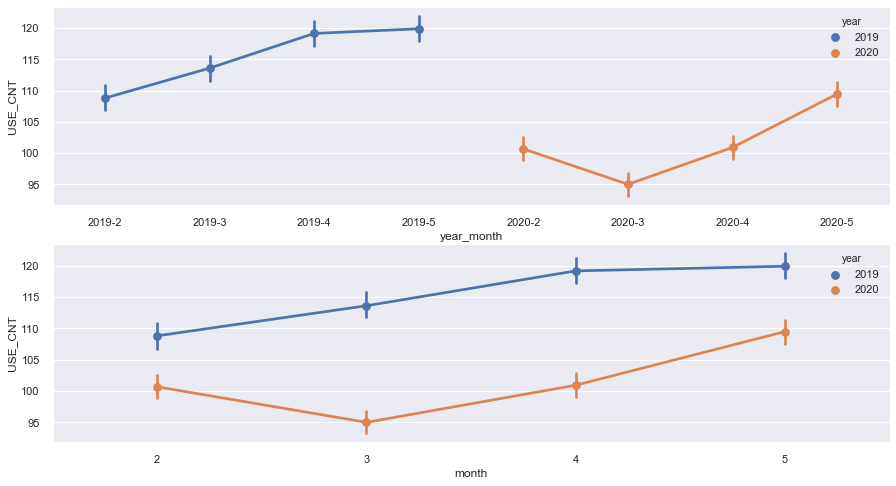

In [17]:
fig, ax = plt.subplots(2,1,figsize=(15,8))
sns.pointplot(data=re_data, x='year_month', y='USE_CNT', hue='year', ax=ax[0], join=True)
sns.pointplot(data=re_data, x='month', y='USE_CNT', hue='year', ax=ax[1], join=True)
plt.show()

In [18]:
re_data_19 = re_data[re_data['year'] == 2019].reset_index()
re_data_20 = re_data[re_data['year'] == 2020].reset_index()

In [19]:
re_data_19.drop('index', inplace=True, axis=1)
re_data_20.drop('index', inplace=True, axis=1)

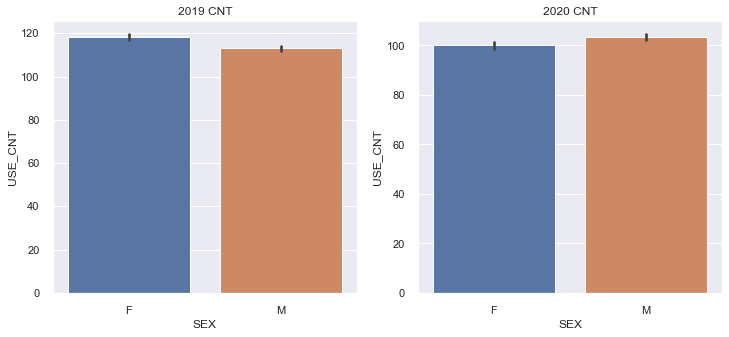

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.barplot(data=re_data_19, x='SEX_CD', y='USE_CNT', ax=ax[0])
ax[0].set(title='2019 CNT', xlabel = 'SEX', ylabel='USE_CNT')
sns.barplot(data=re_data_20, x='SEX_CD', y='USE_CNT', ax=ax[1])
ax[1].set(title='2020 CNT', xlabel = 'SEX', ylabel='USE_CNT')
plt.show()

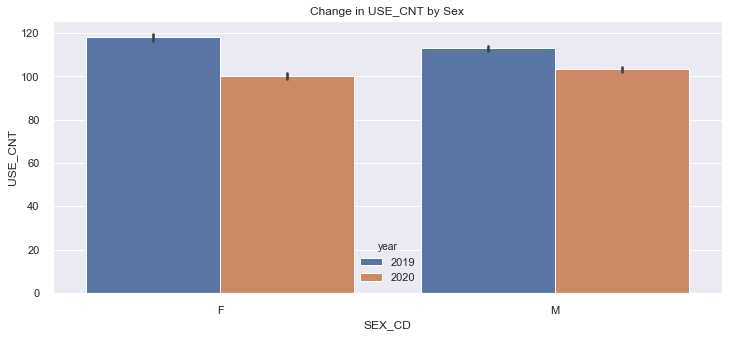

In [21]:
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(data=re_data, x='SEX_CD', y='USE_CNT', hue='year', ax=ax)
ax.set(title='Change in USE_CNT by Sex')
plt.show()

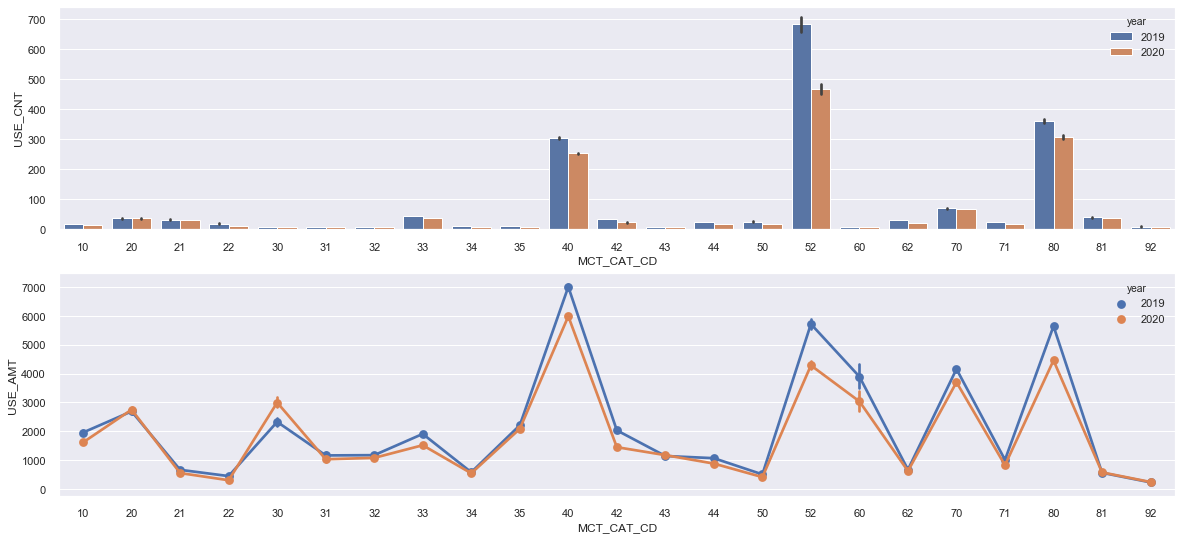

In [36]:
fig, ax = plt.subplots(2,1, figsize=(20,9))

sns.barplot(data=re_data, x='MCT_CAT_CD', y='USE_CNT', ax=ax[0], hue='year')
sns.pointplot(data=re_data, x='MCT_CAT_CD', y='USE_AMT', ax=ax[1], hue='year', join=True)
plt.show()

## 관찰결과   
결제 건수가 눈에 띄게 많은 40(유통), 52(사무통신), 80(요식업) 업종은 결제건수가 줄어든 만큼 결제 금액도 줄어들었다고 판단   
   
### 특이사항   
30번 업종(가구)는 결제 건수로 차이가 미미하지만 결제 금액이 19년도 보다 20년도에 증가한 것을 확인

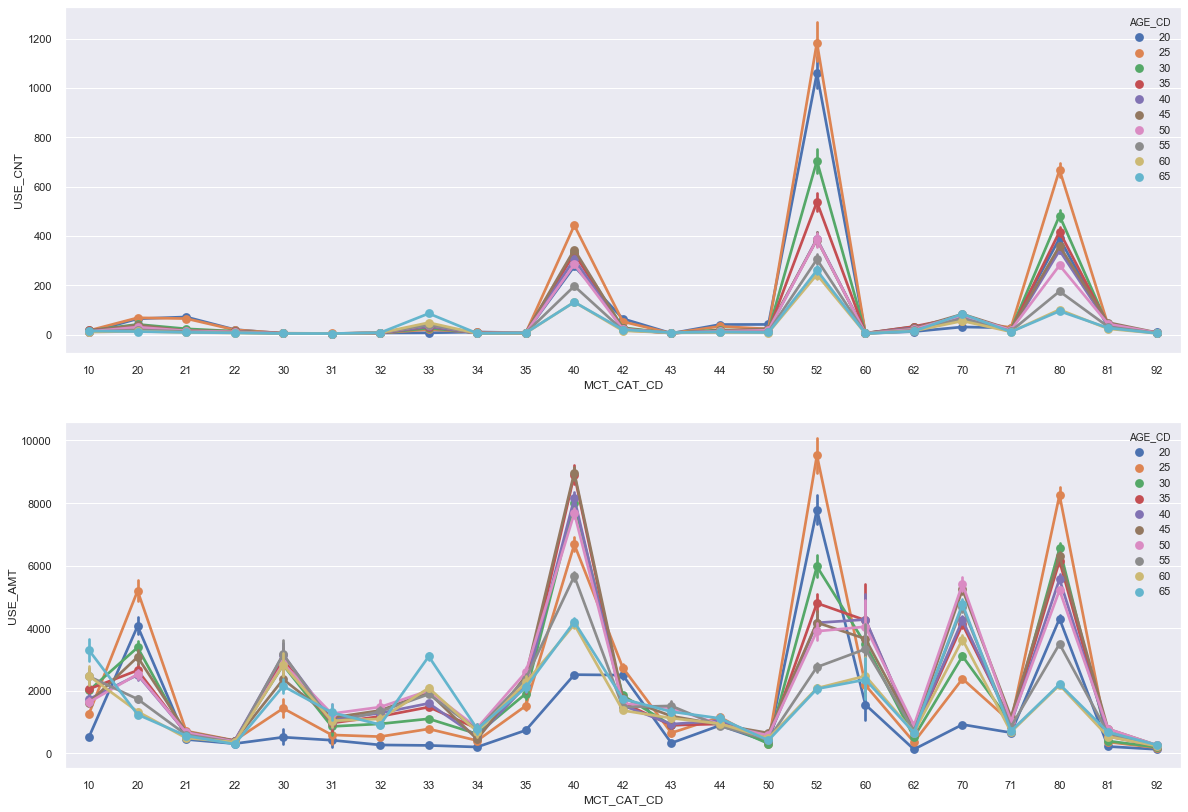

In [48]:
fig, ax = plt.subplots(2,1,figsize=(20,14))

sns.pointplot(data=re_data, x='MCT_CAT_CD', y='USE_CNT', hue='AGE_CD', ax=ax[0])
sns.pointplot(data=re_data, x='MCT_CAT_CD', y='USE_AMT', hue='AGE_CD', ax=ax[1])

plt.show()

# 30번업종(가구)

In [52]:
re_data_19_mc30 = re_data_19[re_data_19['MCT_CAT_CD']==30].reset_index()

In [54]:
re_data_19_mc30.drop('index', inplace=True, axis=1)

In [59]:
re_data_20_mc30 = re_data_20[re_data_20['MCT_CAT_CD']==30].reset_index()
re_data_20_mc30.drop('index', inplace=True, axis=1)

In [67]:
re_data_mc30 = re_data[re_data['MCT_CAT_CD']==30].reset_index()
re_data_mc30.drop('index', inplace=True, axis=1)

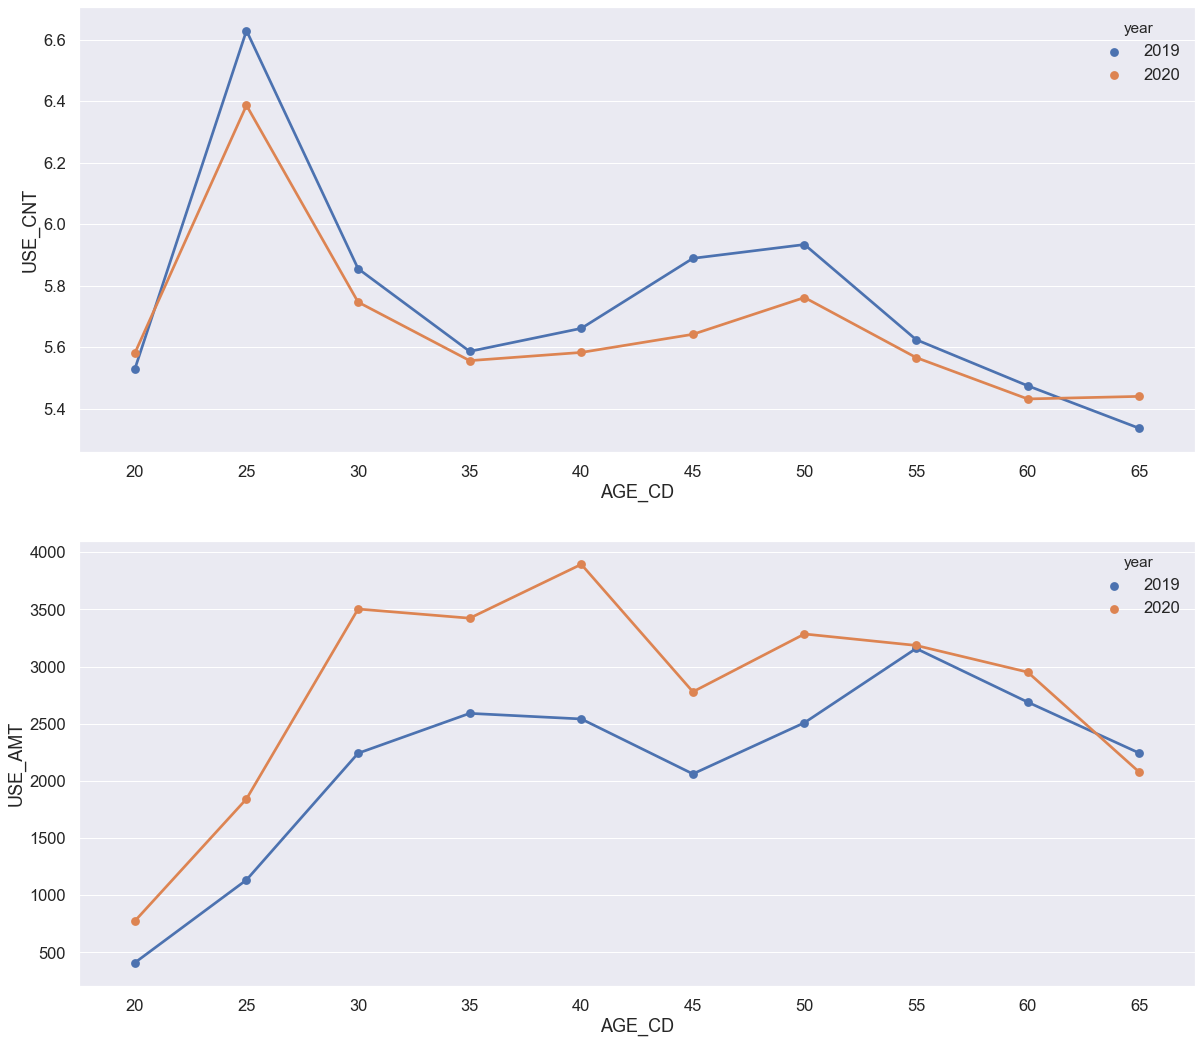

In [75]:
fig, ax = plt.subplots(2,1,figsize=(20,18))

sns.pointplot(data=re_data_mc30, x='AGE_CD', y='USE_CNT',hue='year',  ax=ax[0], ci=None)
sns.pointplot(data=re_data_mc30, x='AGE_CD', y='USE_AMT',hue='year',  ax=ax[1], ci=None)

plt.show()

## 가구의 결제 이용건수는 낮아졌지만 이용 금액이 높아진 것으로 보아 더 비싼 제품을 구입했다고 판단

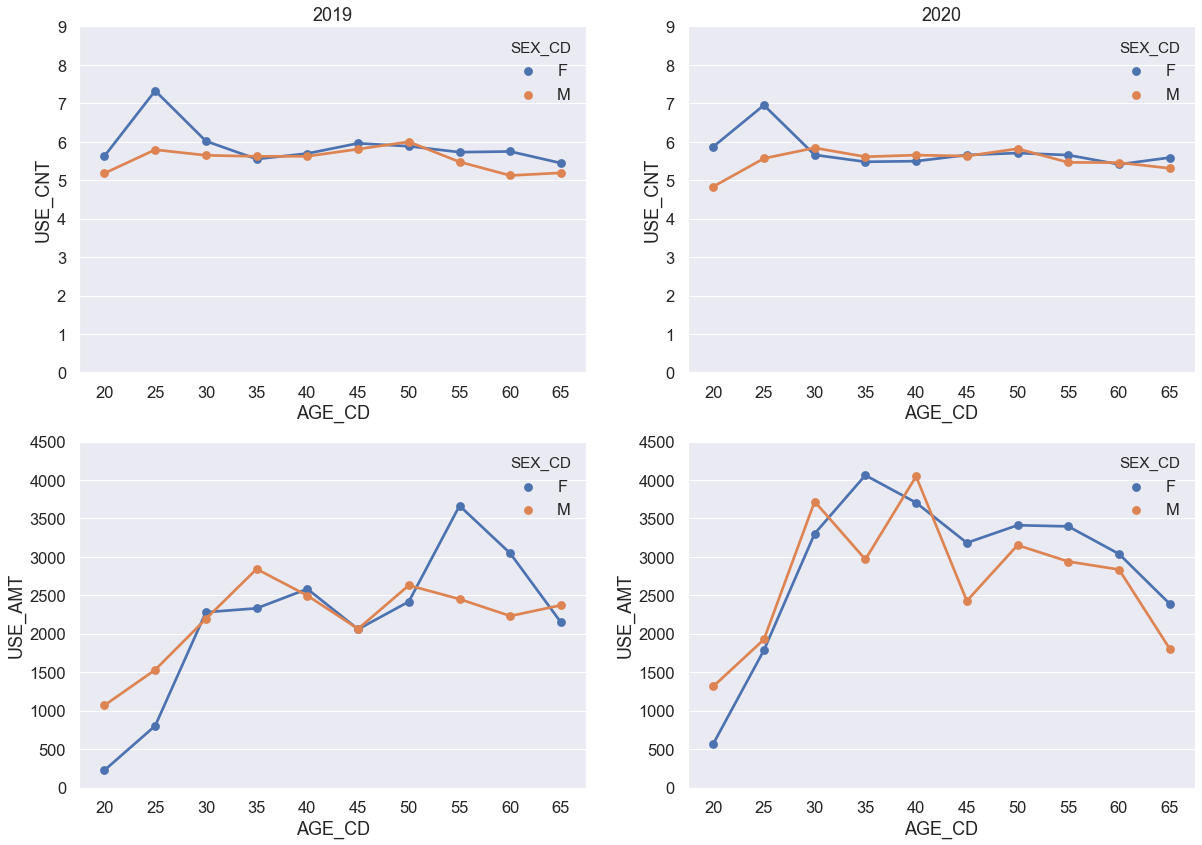

In [80]:
fig, ax = plt.subplots(2,2,figsize=(20,14))

sns.pointplot(data=re_data_19_mc30, x='AGE_CD', y='USE_CNT', hue='SEX_CD', ax=ax[0][0], ci=None)
ax[0][0].set(title='2019')
ax[0][0].set_ylim(0, 9)
sns.pointplot(data=re_data_20_mc30, x='AGE_CD', y='USE_CNT', hue='SEX_CD', ax=ax[0][1], ci=None)
ax[0][1].set(title='2020')
ax[0][1].set_ylim(0, 9)

sns.pointplot(data=re_data_19_mc30, x='AGE_CD', y='USE_AMT', hue='SEX_CD', ax=ax[1][0], ci=None)
ax[1][0].set_ylim(0, 4500)
sns.pointplot(data=re_data_20_mc30, x='AGE_CD', y='USE_AMT', hue='SEX_CD', ax=ax[1][1], ci=None)
ax[1][1].set_ylim(0, 4500)



plt.show()

### 젊은 층의 남, 여 모두 이용금액이 증가한 것을 볼 수 있다

# 외국인

In [158]:
fo_data=pd.read_csv('data/shinhan_card/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt', encoding='euc-kr', delimiter = '\t', parse_dates=['STD_DD'])

In [159]:
fo_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,2019-02-04,260,510,81,대만,2,30.0
1,2019-02-13,260,510,40,대만,2,32.0
2,2019-04-16,260,510,40,대만,2,16.0
3,2019-04-19,260,510,42,대만,3,610.0
4,2019-03-08,260,510,10,대만,7,629.0


In [160]:
fo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238829 entries, 0 to 238828
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   STD_DD      238829 non-null  datetime64[ns]
 1   GU_CD       238829 non-null  int64         
 2   DONG_CD     238829 non-null  int64         
 3   MCT_CAT_CD  238829 non-null  int64         
 4   COUNTRY_NM  238829 non-null  object        
 5   USE_CNT     238829 non-null  int64         
 6   USE_AMT     238826 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 12.8+ MB


In [161]:
fo_data['year'] = fo_data['STD_DD'].dt.year
fo_data['month'] = fo_data['STD_DD'].dt.month
fo_data['day'] = fo_data['STD_DD'].dt.day

In [162]:
def create_year_month(STD_DD):
    return '{0}-{1}'.format(STD_DD.year, STD_DD.month)

fo_data['year_month'] = fo_data['STD_DD'].apply(create_year_month)

fo_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT,year,month,day,year_month
0,2019-02-04,260,510,81,대만,2,30.0,2019,2,4,2019-2
1,2019-02-13,260,510,40,대만,2,32.0,2019,2,13,2019-2
2,2019-04-16,260,510,40,대만,2,16.0,2019,4,16,2019-4
3,2019-04-19,260,510,42,대만,3,610.0,2019,4,19,2019-4
4,2019-03-08,260,510,10,대만,7,629.0,2019,3,8,2019-3


In [163]:
fo_data = fo_data.sort_values('STD_DD').reset_index()

In [164]:
fo_data.drop('index', inplace=True, axis=1)
fo_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT,year,month,day,year_month
0,2019-02-01,260,670,40,미국,2,10.0,2019,2,1,2019-2
1,2019-02-01,140,550,40,아시아,60,3763.0,2019,2,1,2019-2
2,2019-02-01,110,545,20,미국,2,20.0,2019,2,1,2019-2
3,2019-02-01,140,550,80,미주,54,1534.0,2019,2,1,2019-2
4,2019-02-01,140,635,81,미국,1,4.0,2019,2,1,2019-2


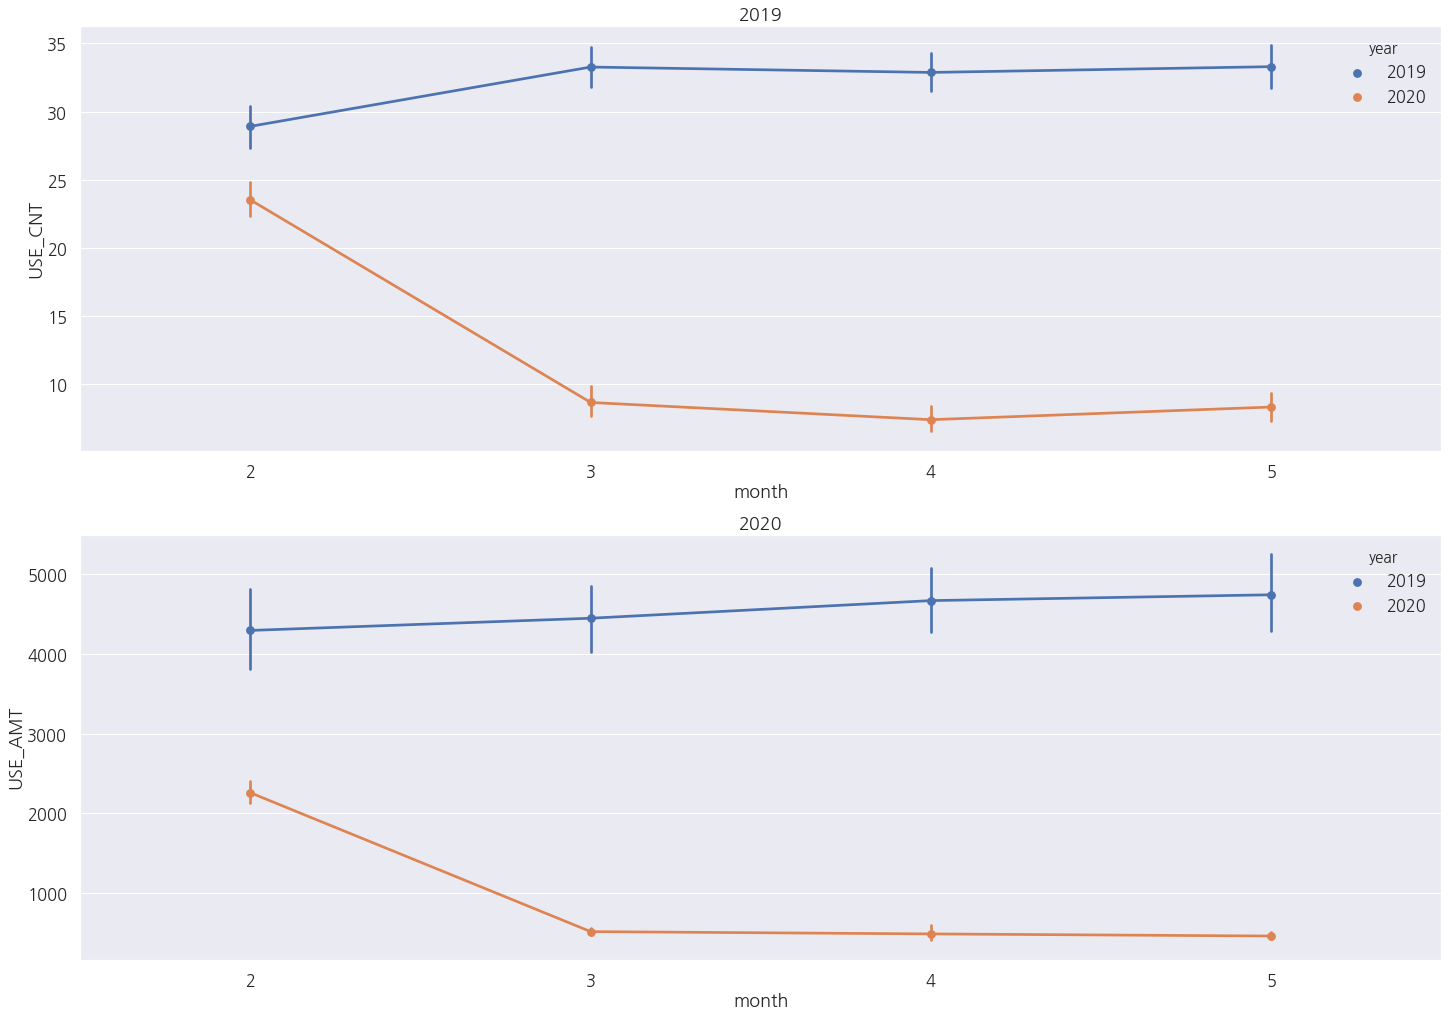

In [188]:
fig, ax = plt.subplots(2,1, figsize=(20,14), constrained_layout=True)

sns.pointplot(data=fo_data, x='month', y='USE_CNT', hue='year',ax=ax[0])
ax[0].set(title='2019')
sns.pointplot(data=fo_data, x='month', y='USE_AMT', hue='year',ax=ax[1])
ax[1].set(title='2020')

plt.show()

In [165]:
fo_data_19 = fo_data[fo_data['year']==2019].reset_index()

In [166]:
fo_data_20 = fo_data[fo_data['year']==2020].reset_index()

In [167]:
fo_data_19.drop('index', inplace=True, axis=1)
fo_data_20.drop('index', inplace=True, axis=1)

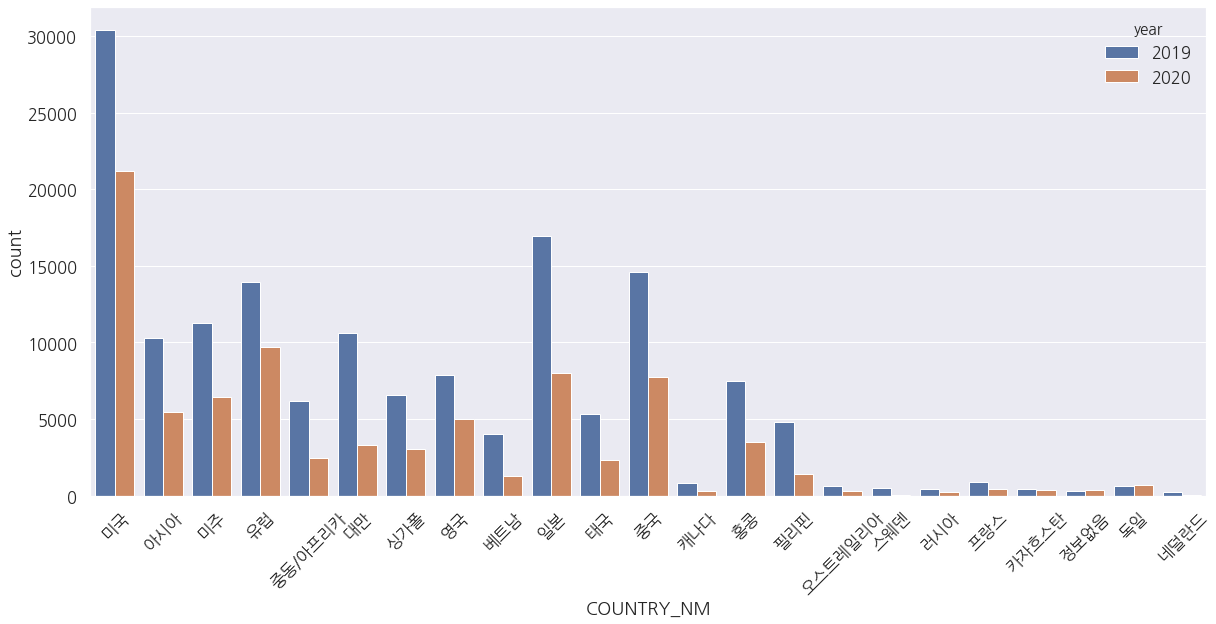

In [168]:
fig,ax = plt.subplots(figsize=(20,9))
sns.countplot(data=fo_data, x='COUNTRY_NM', ax=ax, hue='year')
plt.xticks(rotation =45)

plt.show()

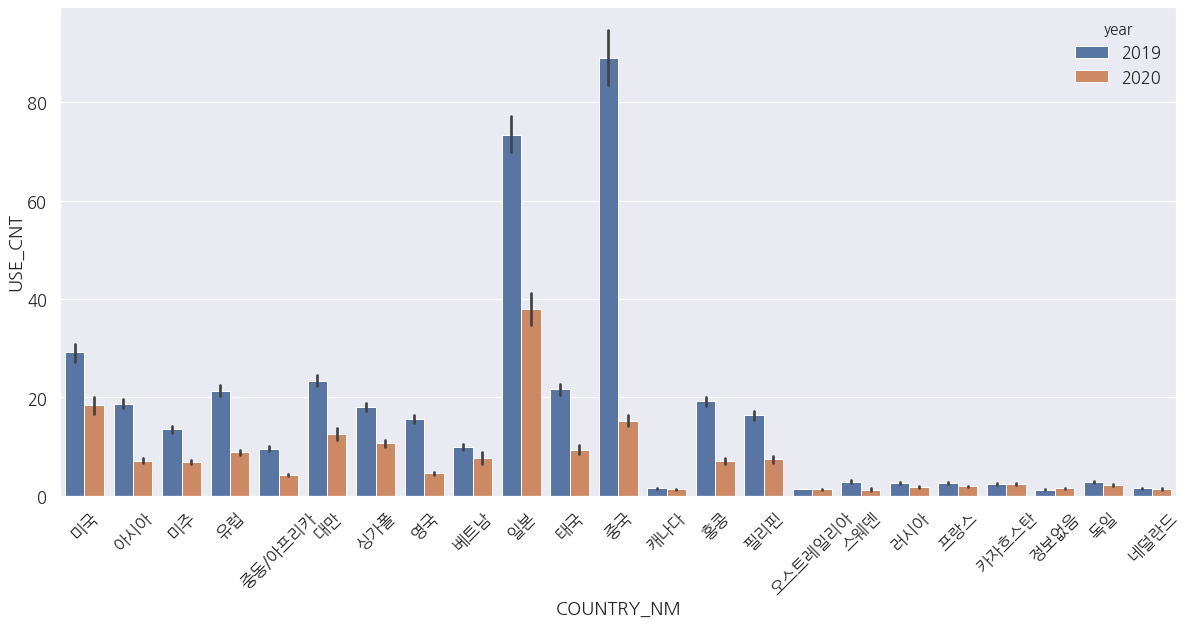

In [169]:
fig, ax = plt.subplots(figsize=(20,9))

sns.barplot(data=fo_data, x='COUNTRY_NM', y='USE_CNT', hue='year', ax=ax)
plt.xticks(rotation =45)
plt.show()

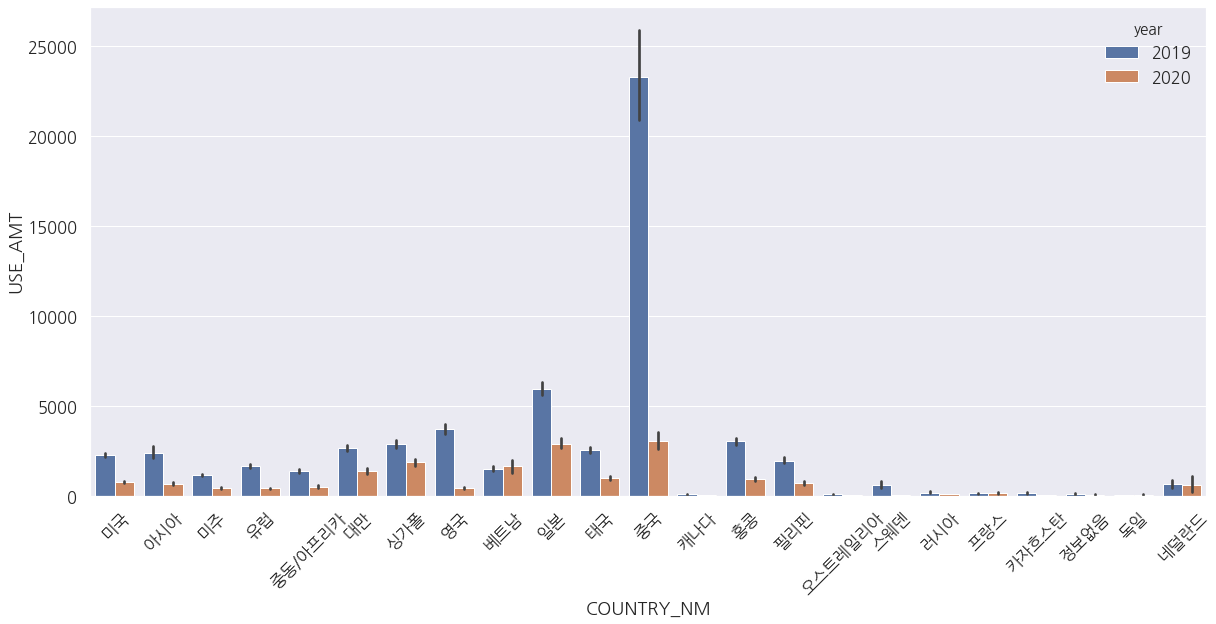

In [171]:
fig, ax = plt.subplots(figsize=(20,9))

sns.barplot(data=fo_data, x='COUNTRY_NM', y='USE_AMT', hue='year', ax=ax)
plt.xticks(rotation =45)
plt.show()

2020년에 들어 중국 관광객의 사용금액이 크게 줄어든 것을 볼 수 있다  
2019년에 중국 관광객이 어떤 업종에서 결제를 많이 했는지 알아보자

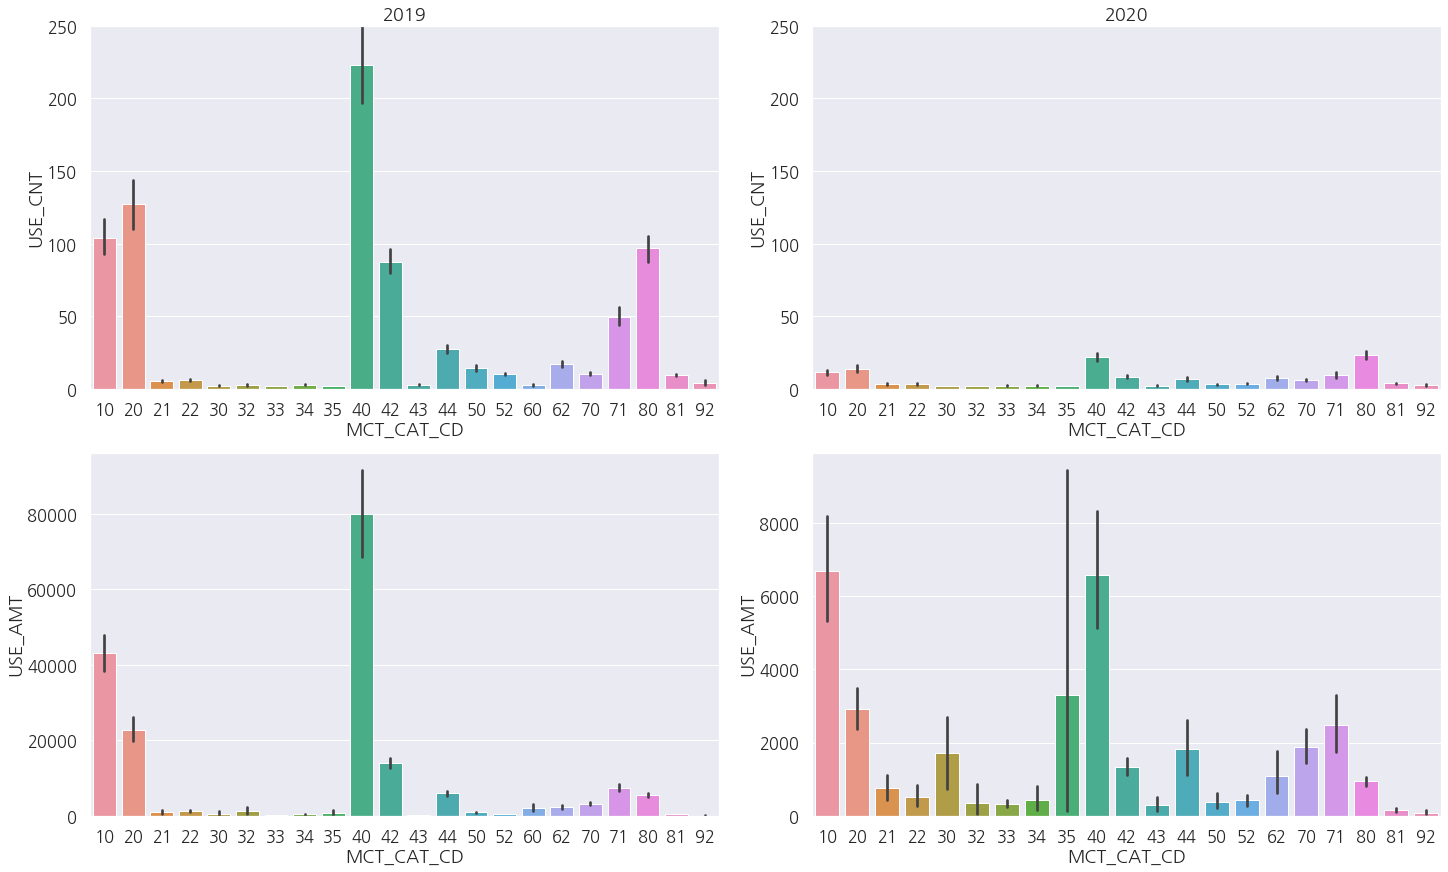

In [183]:
fig , ax = plt.subplots(2,2,figsize=(20,12),constrained_layout=True)

sns.barplot(data=fo_data_19[fo_data_19['COUNTRY_NM']=='중국'] , x='MCT_CAT_CD', y='USE_CNT', ax=ax[0][0])
ax[0][0].set(title='2019')
ax[0][0].set_ylim(0, 250)
sns.barplot(data=fo_data_19[fo_data_19['COUNTRY_NM']=='중국'] , x='MCT_CAT_CD', y='USE_AMT', ax=ax[1][0])

sns.barplot(data=fo_data_20[fo_data_20['COUNTRY_NM']=='중국'] , x='MCT_CAT_CD', y='USE_CNT', ax=ax[0][1])
ax[0][1].set(title='2020')
ax[0][1].set_ylim(0, 250)
sns.barplot(data=fo_data_20[fo_data_20['COUNTRY_NM']=='중국'] , x='MCT_CAT_CD', y='USE_AMT', ax=ax[1][1])

plt.show()

## 중국 관광객 특이사항  
> - 중국 관광객의 결제 이용건수는 크게 줄었지만 이용금액은 높은 것을 확인할 수 있다  
> - 10번(숙박), 30번(가구), 71번(보건위생)이 증가한 것을 볼 수 있다  
> - 35번(가전)의 경우 2020년에 급격하게 증가한 것을 볼 수 있다  
> - 70번(의료기관)의 경우 코로나 19 이슈로 인해 많아졌다고 판단

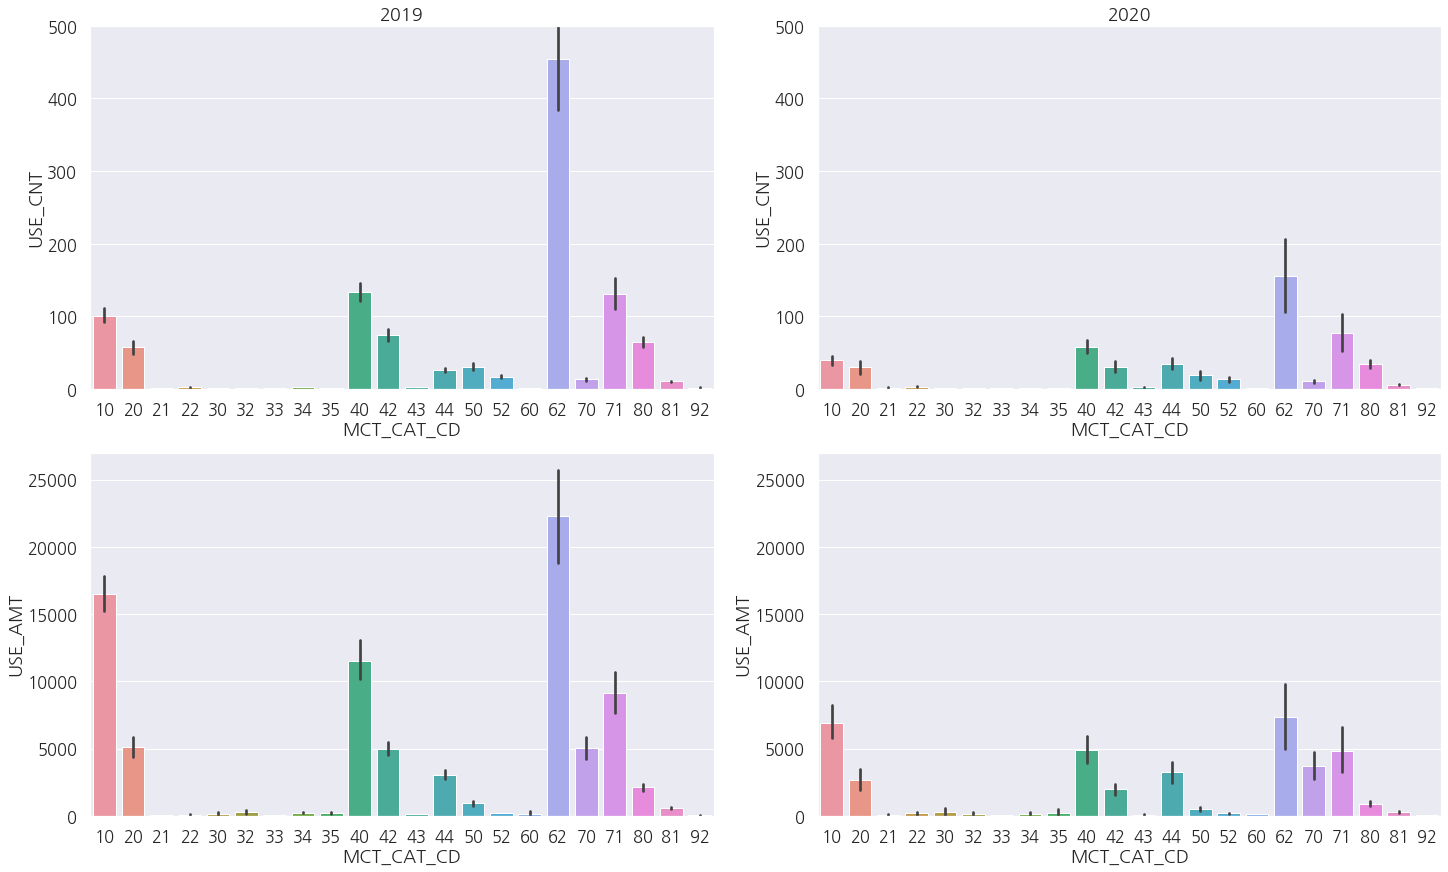

In [191]:
fig , ax = plt.subplots(2,2,figsize=(20,12),constrained_layout=True)

sns.barplot(data=fo_data_19[fo_data_19['COUNTRY_NM']=='일본'] , x='MCT_CAT_CD', y='USE_CNT', ax=ax[0][0])
ax[0][0].set(title='2019')
ax[0][0].set_ylim(0, 500)
sns.barplot(data=fo_data_19[fo_data_19['COUNTRY_NM']=='일본'] , x='MCT_CAT_CD', y='USE_AMT', ax=ax[1][0])
ax[1][0].set_ylim(0, 27000)
sns.barplot(data=fo_data_20[fo_data_20['COUNTRY_NM']=='일본'] , x='MCT_CAT_CD', y='USE_CNT', ax=ax[0][1])
ax[0][1].set(title='2020')
ax[0][1].set_ylim(0, 500)
sns.barplot(data=fo_data_20[fo_data_20['COUNTRY_NM']=='일본'] , x='MCT_CAT_CD', y='USE_AMT', ax=ax[1][1])
ax[1][1].set_ylim(0, 27000)

plt.show()

## 일본 관광객 특이사항  
> - 전체적인 업종의 이용 건수, 이용금액 모두 크게 감소했다  
> - 62번(자동차 정비)가 2019년에 가장 많이 있었다 (일본 관광객과 자동차 정비의 상관관계?)  
> - 10번(숙박)도 크게 줄어든 것을 볼 수 있다